In [1]:
import gc
import warnings
import numpy as np
import pandas as pd
# Sklearn imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Visualization
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
# Import dataset
d = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Remove customer IDs from the data set
d = d.iloc[:,1:]

# Remove all seniors from dataset
d = d[d['SeniorCitizen'] == 0]
d = d.drop(columns='SeniorCitizen')

In [4]:
# Reduce the dataset to customers that churned
churners = d['Churn'] == 'Yes'
churnset = d[churners]

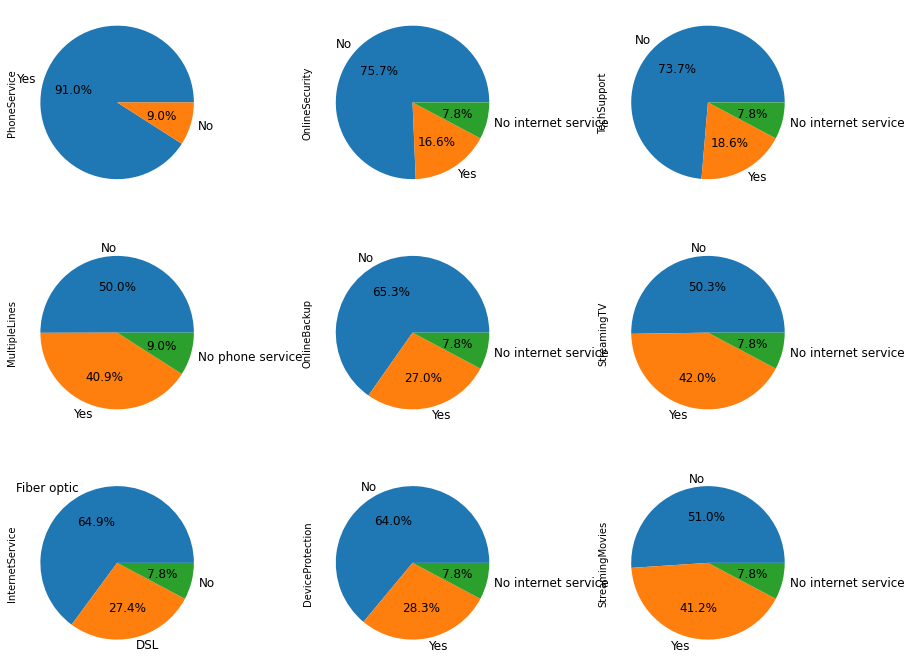

In [12]:
# What service types customers had when they churned

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15, 12))
for i, item in enumerate(services):
    if i < 3:
        (churnset[item].value_counts()*100.0 /len(d)).plot.pie(autopct='%.1f%%', subplots=True, ax=axes[i,0], figsize =(5,5), fontsize = 12 )
    elif i >=3 and i < 6:
        (churnset[item].value_counts()*100.0 /len(d)).plot.pie(autopct='%.1f%%', subplots=True, ax=axes[i-3,1], figsize =(5,5), fontsize = 12 )
    elif i < 9:
        (churnset[item].value_counts()*100.0 /len(d)).plot.pie(autopct='%.1f%%', subplots=True, ax=axes[i-6,2], figsize =(5,5), fontsize = 12 )